# Basics of Supervised Learning
- Learn from (input, output) pairs
- Generalize to new input, predict unknown output

![supervised_workflow](images/supervised_workflow.svg)

In [22]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib notebook

In [23]:
from sklearn.datasets import load_digits
import numpy as np
digits = load_digits()
digits.keys()

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])

In [24]:
digits.data.shape

(1797, 64)

In [25]:
digits.target.shape

(1797,)

In [26]:
digits.target

array([0, 1, 2, ..., 8, 9, 8])

In [27]:
np.bincount(digits.target)

array([178, 182, 177, 183, 181, 182, 181, 179, 174, 180])

In [28]:
plt.matshow(digits.data[0].reshape(8, 8), cmap=plt.cm.Greys)

<IPython.core.display.Javascript object>

In [29]:
digits.target[0]

0

In [30]:
fig, axes = plt.subplots(4, 4)
for x, y, ax in zip(digits.data, digits.target, axes.ravel()):
    ax.set_title(y)
    ax.imshow(x.reshape(8, 8), cmap="gray_r")
    ax.set_xticks(())
    ax.set_yticks(())
plt.tight_layout()

<IPython.core.display.Javascript object>

![train_test_split](images/train_test_split_matrix.svg)

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(digits.data,
                                                    digits.target)

Really Simple API
-------------------
0) Import your model class

In [32]:
from sklearn.svm import LinearSVC

1) Instantiate an object and set the parameters

In [33]:
svm = LinearSVC()

2) Fit the model

In [34]:
svm.fit(X_train, y_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

3) Apply / evaluate

In [35]:
print(svm.predict(X_train))
print(y_train)

[8 9 3 ..., 8 0 3]
[8 9 3 ..., 8 0 3]


In [36]:
svm.score(X_train, y_train)

0.99406087602078697

In [37]:
svm.score(X_test, y_test)

0.9244444444444444

And again
---------

In [38]:
from sklearn.ensemble import RandomForestClassifier

In [39]:
rf = RandomForestClassifier(n_estimators=50)

In [40]:
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [41]:
rf.score(X_test, y_test)

0.9622222222222222

# Exercise
Load the iris dataset from seaborn using

```python
iris = sns.load_dataset("iris")
```
Visualize the dataset. Extract the features (independent variables) and the target (dependent variable).
Split it into training and test set using ``train_test_split``.


Then train an evaluate a classifier of your choice. Try ``sklearn.neighbors.KNeighborsClassifier`` or ``sklearn.ensemble.RandomForestClassifier`` for example.


In [42]:
# your solution

# Dummy encoding of categorical variables

In [43]:
import pandas as pd
df = pd.DataFrame({'salary': [103, 89, 142, 54, 63, 219],
                   'boro': ['Manhatten', 'Queens', 'Manhatten', 'Brooklyn', 'Brooklyn', 'Bronx']})
df

,boro,salary
0,Manhatten,103
1,Queens,89
2,Manhatten,142
3,Brooklyn,54
4,Brooklyn,63
5,Bronx,219


In [44]:
pd.get_dummies(df)

,salary,boro_Bronx,boro_Brooklyn,boro_Manhatten,boro_Queens
0,103,0,0,1,0
1,89,0,0,0,1
2,142,0,0,1,0
3,54,0,1,0,0
4,63,0,1,0,0
5,219,1,0,0,0


In [45]:
df = pd.DataFrame({'salary': [103, 89, 142, 54, 63, 219],
                   'boro': [0, 1,0, 2, 2, 3]})
df

,boro,salary
0,0,103
1,1,89
2,0,142
3,2,54
4,2,63
5,3,219


In [46]:
pd.get_dummies(df)

,boro,salary
0,0,103
1,1,89
2,0,142
3,2,54
4,2,63
5,3,219


# Exercise
Load the california housing data from data/housing.csv and apply dummy encoding.

In [47]:
# solution

# Scaling data

In [48]:
import seaborn.apionly as sns
iris = sns.load_dataset("iris")
iris.head()

ModuleNotFoundError: No module named 'seaborn'

In [49]:
X = iris.iloc[:, :-1]  # could do iris.pop("species") but that is changing "iris"
y = iris.species
X.shape

NameError: name 'iris' is not defined

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

NameError: name 'X' is not defined

In [51]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)

In [52]:
X_train_scaled[:10]

array([[  0.00000000e+00,  -3.18315780e-01,   1.90540433e-01,
          5.18797918e-01,   2.62516283e-01,  -3.20078398e-01,
         -4.12319273e-01,  -1.25761594e-01,  -6.30488325e-02,
          6.66707445e-01,   1.03506848e+00,  -2.40063810e-01,
         -8.65764955e-02,   1.11159755e+00,  -5.14501138e-01,
         -1.36381384e-01,  -5.15600932e-02,   1.81330024e+00,
          1.88083684e-01,  -1.19430506e+00,   7.68610936e-01,
          4.81415795e-01,  -5.56638575e-01,  -1.13287576e-01,
         -3.85614944e-02,   1.43421314e+00,   3.21140536e-01,
         -9.87376897e-02,   9.73281296e-01,  -8.14426909e-01,
         -6.47498675e-01,  -4.72455591e-02,   0.00000000e+00,
         -6.75806466e-01,   8.47679712e-01,   1.12773211e+00,
         -3.69269152e-02,  -1.52737062e+00,  -8.26937817e-01,
          0.00000000e+00,  -6.37048437e-02,  -5.38453797e-01,
          9.34452452e-01,   9.17807459e-01,   7.10823068e-01,
          1.31289418e-01,  -7.94784078e-01,  -9.04142203e-02,
        

In [53]:
X_test_scaled = scaler.transform(X_test)

In [54]:
svm = LinearSVC()
svm.fit(X_train_scaled, y_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [55]:
svm.predict(X_test_scaled)

array([5, 4, 7, 8, 7, 5, 6, 6, 1, 7, 1, 6, 1, 2, 4, 9, 2, 7, 8, 6, 7, 9, 2,
       6, 0, 4, 1, 0, 7, 3, 3, 7, 9, 9, 1, 9, 5, 6, 6, 0, 7, 4, 7, 2, 7, 8,
       9, 9, 5, 6, 9, 5, 9, 9, 3, 3, 2, 2, 1, 5, 6, 2, 4, 7, 1, 4, 6, 5, 3,
       6, 4, 3, 0, 0, 7, 0, 0, 2, 2, 6, 3, 3, 7, 1, 3, 8, 7, 1, 8, 2, 4, 6,
       4, 5, 8, 3, 2, 3, 0, 6, 1, 6, 3, 5, 2, 9, 3, 2, 1, 1, 1, 8, 2, 4, 7,
       9, 6, 3, 6, 2, 3, 2, 8, 3, 8, 6, 9, 6, 0, 6, 3, 4, 9, 0, 7, 4, 5, 7,
       4, 9, 1, 8, 8, 4, 5, 1, 6, 2, 2, 0, 4, 3, 5, 7, 6, 3, 4, 0, 3, 0, 6,
       0, 0, 5, 4, 9, 2, 5, 0, 5, 5, 7, 0, 7, 2, 1, 6, 7, 6, 7, 9, 2, 4, 0,
       7, 0, 8, 8, 5, 4, 5, 3, 6, 8, 6, 9, 9, 2, 1, 5, 0, 7, 1, 1, 6, 8, 5,
       0, 7, 6, 6, 2, 0, 1, 7, 5, 8, 6, 1, 8, 3, 5, 3, 5, 4, 8, 5, 7, 0, 3,
       7, 3, 3, 3, 1, 5, 8, 9, 1, 5, 1, 9, 0, 3, 3, 3, 1, 1, 0, 9, 2, 4, 5,
       6, 8, 5, 6, 1, 6, 8, 9, 4, 8, 6, 9, 0, 3, 7, 1, 1, 7, 1, 8, 4, 0, 3,
       4, 8, 4, 1, 1, 8, 3, 5, 7, 2, 6, 6, 4, 1, 1, 4, 0, 3, 6, 5, 3, 0, 1,
       5, 7,

In [56]:
svm.score(X_test_scaled, y_test)

0.94222222222222218

# Exercise
- load the california housing data and drop columns with missing values
- Separate features and target in the california housing dataset (with dummy encoding)
- use train_test_split to split it into training and test data
- use the StandardScaler to scale training and test data
- Fit the sklearn.linear_modle.Ridge model (ridge regression, a linear regression model) and evaluate it on the test data.

Note: the score method computes the R^2 for regression problems

In [57]:
# solution here

In [58]:
# Inspecting the ridge model

In [59]:
X_train.columns

AttributeError: 'numpy.ndarray' object has no attribute 'columns'

In [60]:
ridge.coef_

NameError: name 'ridge' is not defined

<IPython.core.display.Javascript object>


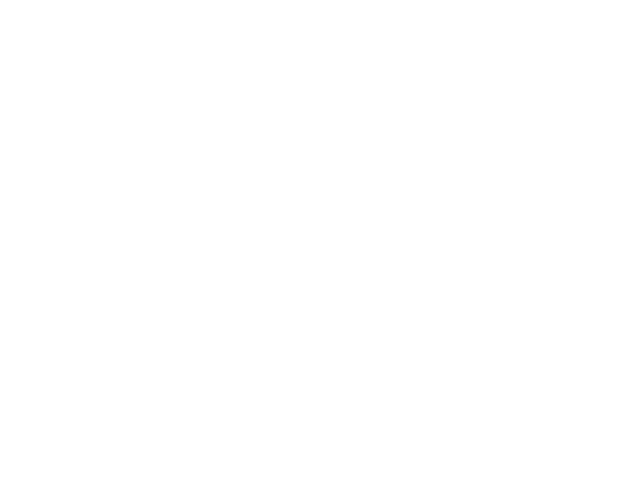

NameError: name 'ridge' is not defined

In [61]:
plt.figure()
plt.barh(range(len(ridge.coef_)), ridge.coef_)
plt.yticks(range(len(ridge.coef_)), X_train.columns);